1.Random Forest Scenario: Healthcare – Predicting Patient Readmission 

A hospital wants to predict whether patients are likely to be readmitted within 30 days of discharge. They have historical data about patients, including: 

Age 

BMI (Body Mass Index) 

Blood_Pressure (average systolic reading) 

Days_Hospitalized 

Satisfaction_Score (post-discharge survey rating) 

Readmitted (Yes/No) 

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:

df = pd.read_csv('healthcare_readmission_500.csv')


In [ ]:


X = df[['Age', 'BMI', 'Blood_Pressure', 'Days_Hospitalized', 'Satisfaction_Score']]
y = df['Readmitted'].str.strip().str.lower().eq('yes').astype(int)


In [ ]:


Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:


model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=10,           
    min_samples_leaf=2,     
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


model.fit(Xtrain, ytrain)


y_pred = model.predict(Xtest)


print("Accuracy:", accuracy_score(ytest, y_pred))
print("\nClassification Report:\n", classification_report(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))


Accuracy: 0.9466666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       106
           1       0.95      0.86      0.90        44

    accuracy                           0.95       150
   macro avg       0.95      0.92      0.93       150
weighted avg       0.95      0.95      0.95       150

Confusion Matrix:
 [[104   2]
 [  6  38]]


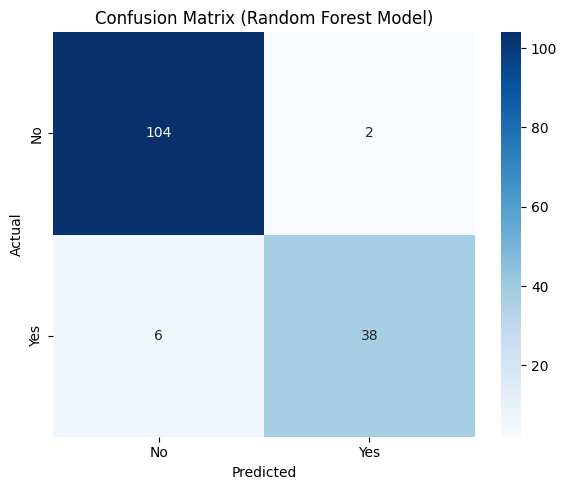

In [8]:


cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No', 'Yes'],
    yticklabels=['No', 'Yes']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest Model)")
plt.tight_layout()
plt.show()


2.Assignment Scenarios: Python Machine Learning 

Random Forest Scenario: Loan Approval Prediction 

A commercial bank wants to decide whether to approve a loan application. They have historical data about customers, including: 

Age (years) 

Income (annual income in local currency) 

Credit Score (300–850 scale) 

Loan Amount Requested (currency units) 

Loan Approved (Yes/No) 

In [10]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:

df = pd.read_csv('loan_approvals_100.csv')


In [ ]:


X = df[['Age', 'Income', 'Credit Score', 'Loan Amount Requested']]

y = df['Loan Approved'].astype(str).str.strip().str.lower().eq('yes').astype(int)


In [26]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [27]:



model = RandomForestClassifier(
    n_estimators=800,              
    max_depth=None,           
    min_samples_leaf=2,          
    max_features='sqrt',  
    class_weight='balanced_subsample',  
    oob_score=True,              
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)


In [28]:
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.94      0.89      0.91        18

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
 [[11  1]
 [ 2 16]]


In [29]:


importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", importances)



Feature Importances:
 Age                      0.499140
Credit Score             0.370727
Loan Amount Requested    0.130133
Income                   0.000000
dtype: float64


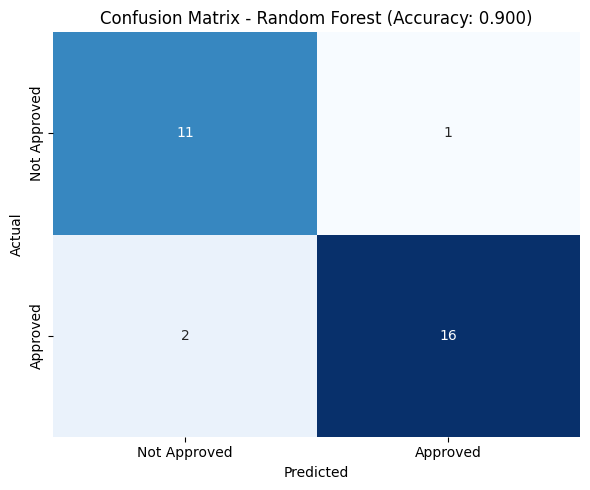

In [30]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', cbar=False,
    xticklabels=['Not Approved', 'Approved'],
    yticklabels=['Not Approved', 'Approved']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Random Forest (Accuracy: {acc:.3f})')
plt.tight_layout()
plt.show()


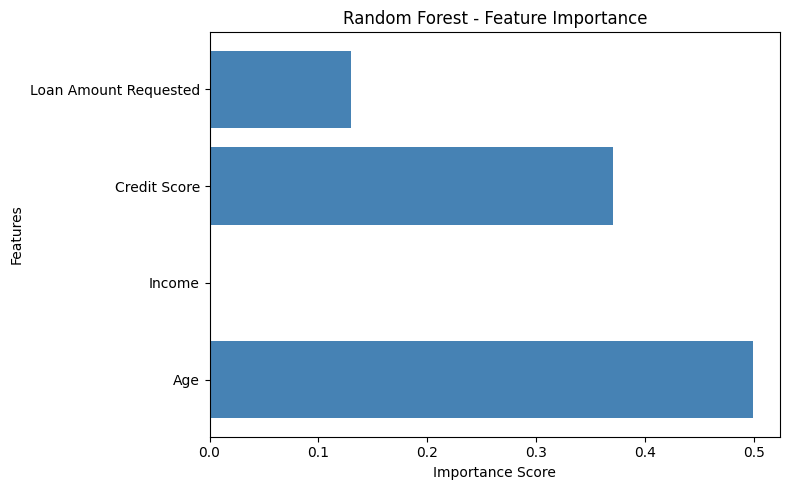

In [31]:
import matplotlib.pyplot as plt


feature_importance = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance, color='steelblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importance')
plt.tight_layout()
plt.show()